In [19]:
from brax.io import html, mjcf

from brax import base
from brax.kinematics import forward

from etils import epath

import jax.numpy as jp

import sys

from IPython.display import HTML, display_html

from PIL import Image
import io
import matplotlib.pyplot as plt

sys.path.append('/nfs/nhome/live/aoomerjee/MSc-Thesis/')
from hct.io import html

morphology = "ant_maze"

path = "/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/envs/assets/ant_maze.html"

#path = epath.resource_path(f'{morphology}.xml') #/ f'/envs/assets/{morphology}.xml'
sys = mjcf.load(f'{morphology}.xml')
add_floor = False
if add_floor and not [g for g in sys.geoms if isinstance(g, base.Plane)]:
    print(1)
q = sys.init_q
qd = jp.zeros((sys.qd_size(), ))
x, xd = forward(sys, q, qd)

state = base.State(
    q, qd, x, xd, None
)

#html_render = html.render(sys, [state, state, state])
html_save = html.save(path, sys, [state])
'''
img_render = image.render(sys, [state], width=1000, height=1000, ssaa=8)

#HTML(render)
# Suppose image_bytes contains the bytes returned by f.getvalue()
image_bytes = img_render

# Convert the bytes to a file-like object
image_file = io.BytesIO(image_bytes)

# Open the image with PIL
image = Image.open(image_file)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off') # To turn off axes
plt.show()'''
print(html_render)


<!DOCTYPE html>
<html>

  <head>
    <title>Brax visualizer</title>
    <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">
  </head>

  <style>
    body {
      margin: 0;
      padding: 0;
    }

    #brax-viewer {
      height: 480px;
      margin: 0;
      padding: 0;
    }
  </style>
  <script async src="https://unpkg.com/es-module-shims@1.6.3/dist/es-module-shims.js"></script>

  <script type="importmap">
    {
      "imports": {
        "three": "https://unpkg.com/three@0.150.1/build/three.module.js",
        "three/addons/": "https://unpkg.com/three@0.150.1/examples/jsm/",
        "lilgui": "https://cdn.jsdelivr.net/npm/lil-gui@0.18.0/+esm",
        "viewer": "https://cdn.jsdelivr.net/gh/google/brax@v0.9.1/brax/visualizer/js/viewer.js"
      }
    }
  </script>

  <script type="application/javascript">
  var system = {"dt": 0.009999999776482582, "gravity": [0.0, 0.0, -9.8100004196167], "viscosity": 0.0, "density": 0.0, "link": {"transform": {"pos": [[0.0, 0.0, 0.

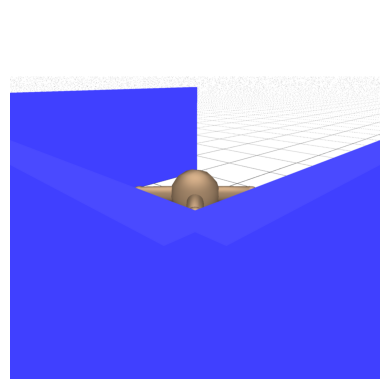